In [47]:
from config import Energy_Key
import json


import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [48]:
key = 'api_key='+Energy_Key

In [49]:
#Base URL to pull emision from
url = 'https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/?'+key+'&frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DC&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=US&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&facets[fuelId][]=TO&facets[sectorId][]=TT&start=2015&end=2015&sort[0][column]=value&sort[0][direction]=asc&offset=0&length=5000'

In [50]:
response = requests.get(url)
response.status_code

200

In [51]:
data = response.json()

In [52]:
#data in json form 
data

{'response': {'total': 52,
  'dateFormat': 'YYYY',
  'frequency': 'annual',
  'data': [{'period': 2015,
    'sectorId': 'TT',
    'sector-name': 'Total carbon dioxide emissions from all sectors',
    'fuelId': 'TO',
    'fuel-name': 'All Fuels',
    'stateId': 'DC',
    'state-name': 'District of Columbia',
    'value': 2.956881,
    'value-units': 'million metric tons of CO2'},
   {'period': 2015,
    'sectorId': 'TT',
    'sector-name': 'Total carbon dioxide emissions from all sectors',
    'fuelId': 'TO',
    'fuel-name': 'All Fuels',
    'stateId': 'VT',
    'state-name': 'Vermont',
    'value': 6.126831,
    'value-units': 'million metric tons of CO2'},
   {'period': 2015,
    'sectorId': 'TT',
    'sector-name': 'Total carbon dioxide emissions from all sectors',
    'fuelId': 'TO',
    'fuel-name': 'All Fuels',
    'stateId': 'RI',
    'state-name': 'Rhode Island',
    'value': 10.804525,
    'value-units': 'million metric tons of CO2'},
   {'period': 2015,
    'sectorId': 'TT',


In [53]:
#Pathway to test state ID 
data['response']['data'][1]['stateId']

'VT'

In [54]:
#Building list to creat data frame
state = []
emissions = []
x = 0

In [55]:
#going through json file and pulling state and CO2 emisions
while x < 52:
    state.append(data['response']['data'][x]['state-name'])
    emissions.append(data['response']['data'][x]['value'])
    x = x+1
    

In [56]:
#building a datfram from state and emissions data
df = pd.DataFrame(list(zip(state, emissions)), columns =['State', 'million metric tons of CO2'])
df

,State,million metric tons of CO2
0,District of Columbia,2.956881
1,Vermont,6.126831
2,Rhode Island,10.804525
3,Delaware,13.905395
4,South Dakota,14.139438
5,New Hampshire,15.278567
6,Maine,16.679089
7,Idaho,18.035914
8,Hawaii,19.781037
9,Montana,32.531645


In [57]:
#sorting by state
emmisions_s = df.sort_values(by=['State'])
clean_emmisions = emmisions_s.reset_index(drop=True)
clean_emmisions

,State,million metric tons of CO2
0,Alabama,119.200889
1,Alaska,35.027804
2,Arizona,94.978784
3,Arkansas,59.053365
4,California,351.408516
5,Colorado,91.303872
6,Connecticut,36.329049
7,Delaware,13.905395
8,District of Columbia,2.956881
9,Florida,237.383359


In [58]:
#Reading GDP data from BEA CSV
gdp_csv = pd.read_csv('2015_GDP.csv')
gdp_csv_s = gdp_csv.sort_values(by=['GeoName'])
clean_gdp = gdp_csv_s[['GeoName','2015']]
clean_gdp_r = clean_gdp.rename(columns={"GeoName":"State",'2015':"GDP in Millions"})
clean_gdp_r

,State,GDP in Millions
1,Alabama,202372.4
2,Alaska,51490.9
3,Arizona,299393.3
4,Arkansas,117786.8
5,California,2473555.9
6,Colorado,320721.1
7,Connecticut,259487.8
8,Delaware,71913.9
9,District of Columbia,124604.7
10,Florida,908519.9


In [59]:
#Merging on state to combine GDP and Emmisions data
finial = clean_gdp_r.merge(clean_emmisions, on='State')
finial

,State,GDP in Millions,million metric tons of CO2
0,Alabama,202372.4,119.200889
1,Alaska,51490.9,35.027804
2,Arizona,299393.3,94.978784
3,Arkansas,117786.8,59.053365
4,California,2473555.9,351.408516
5,Colorado,320721.1,91.303872
6,Connecticut,259487.8,36.329049
7,Delaware,71913.9,13.905395
8,District of Columbia,124604.7,2.956881
9,Florida,908519.9,237.383359


<Axes: xlabel='million metric tons of CO2', ylabel='GDP in Millions'>

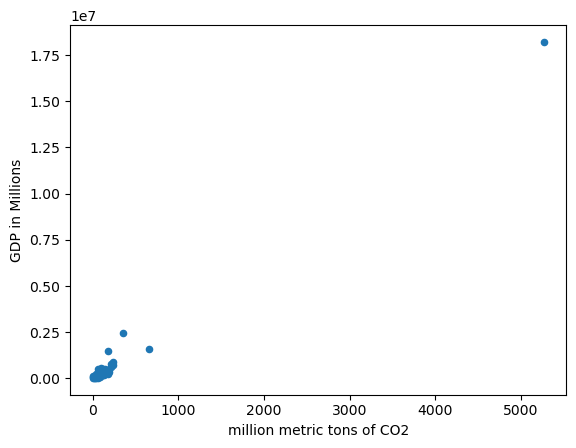

In [60]:
#scatter plot including USA total

finial.plot.scatter(y='GDP in Millions',
                      x='million metric tons of CO2')

In [61]:
#Removing USA of data set to better see the data
finial_states = finial.drop(finial.index[44])
finial_states

,State,GDP in Millions,million metric tons of CO2
0,Alabama,202372.4,119.200889
1,Alaska,51490.9,35.027804
2,Arizona,299393.3,94.978784
3,Arkansas,117786.8,59.053365
4,California,2473555.9,351.408516
5,Colorado,320721.1,91.303872
6,Connecticut,259487.8,36.329049
7,Delaware,71913.9,13.905395
8,District of Columbia,124604.7,2.956881
9,Florida,908519.9,237.383359


<Axes: xlabel='million metric tons of CO2', ylabel='GDP in Millions'>

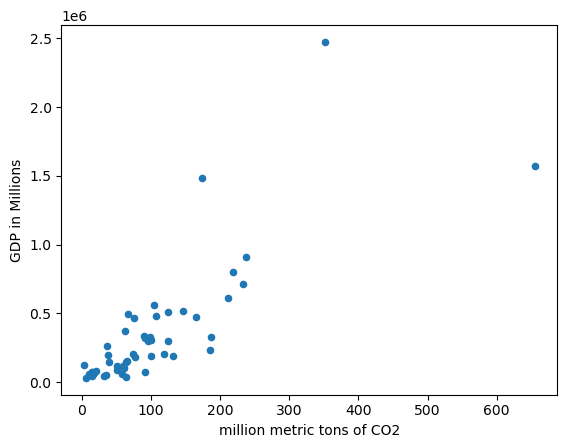

In [62]:
#Scatter plot leaving out USA 
finial_states.plot.scatter(y='GDP in Millions',
                      x='million metric tons of CO2')

In [63]:
from pathlib import Path  
filepath = Path('Alec/E to GDP.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)    
finial_states.to_csv(filepath) 

In [76]:
## initial regres including scatter

#xv = volume['Weight (g)']
#yv = volume['Tumor Volume (mm3)']
#df = whole df
#xn = x name
#yn = y name

def regres(xv,yv,df,xn,yn):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xv, yv)
    
    regress_values = xv * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x=xn, y=yn)
    plt.plot(xv,regress_values,"r-")
    print('pvalue: '+str(pvalue))
    plt.show

pvalue: 5.172205854220462e-12


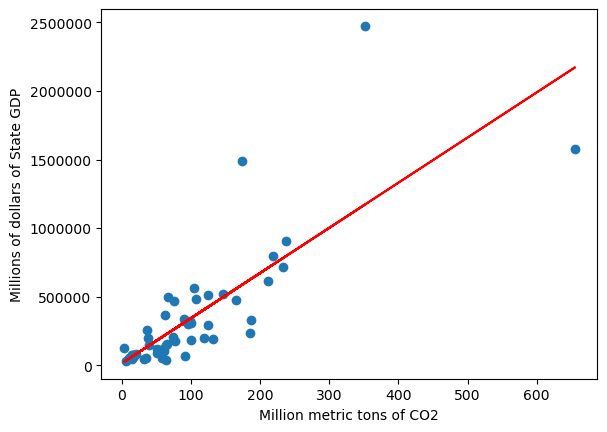

In [77]:
#GDP to emisions with linear regresion
plt.ticklabel_format(style='plain')



plt.xlabel('Million metric tons of CO2')
plt.ylabel('Millions of dollars of State GDP')
regres( finial_states['million metric tons of CO2'], finial_states['GDP in Millions'],finial_states,finial_states['million metric tons of CO2'],finial_states['GDP in Millions'])